## Introdution to Scikit-learn

### Steps to be taken:
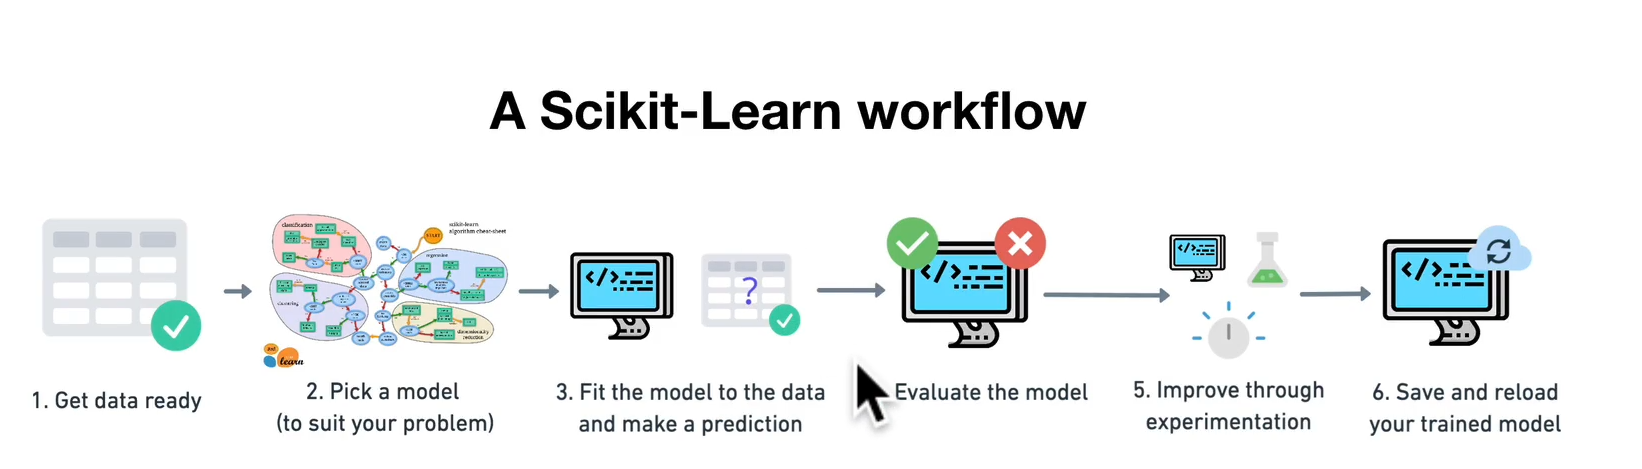

## 1️⃣Getting Data Ready

In [1]:
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
## Create X (features matrix)
X = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

## 2️⃣Choose the right model and hyperparameters

### Hyperparameters are defined as the parameters that are explicitly defined by the user to control the learning process

In [3]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# Defalut hyperparameters
clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 3️⃣Fit the model to training datd

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)

In [5]:
clf.fit(X_train, y_train);

In [6]:
## Make Prediction
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

## 4️⃣Evaluate the model

In [7]:
clf.score(X_train, y_train)

1.0

In [8]:
clf.score(X_test, y_test)

0.8360655737704918

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81        28
           1       0.81      0.91      0.86        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61



In [10]:
confusion_matrix(y_test, y_preds)

array([[21,  7],
       [ 3, 30]], dtype=int64)

In [11]:
accuracy_score(y_test, y_preds)

0.8360655737704918

## 5️⃣Imporve Model

In [12]:
np.random.seed(42)
for i in range(10, 100, 10):
    print (f" Trying model with {i} estimators...")
    Clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print (f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

 Trying model with 10 estimators...
Model accuracy on test set: 83.61%

 Trying model with 20 estimators...
Model accuracy on test set: 83.61%

 Trying model with 30 estimators...
Model accuracy on test set: 83.61%

 Trying model with 40 estimators...
Model accuracy on test set: 83.61%

 Trying model with 50 estimators...
Model accuracy on test set: 83.61%

 Trying model with 60 estimators...
Model accuracy on test set: 83.61%

 Trying model with 70 estimators...
Model accuracy on test set: 83.61%

 Trying model with 80 estimators...
Model accuracy on test set: 83.61%

 Trying model with 90 estimators...
Model accuracy on test set: 83.61%



## 6️⃣Save a model and load it

In [13]:
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [14]:
loaded_model = pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(X_test, y_test)

0.8360655737704918